In [1]:
# Load libraries
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import json
from pickle import dump, load
import numpy as np
import os
from keras.applications.resnet50 import ResNet50
from keras.optimizers import Adam
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model
from keras.utils import np_utils
import random
from keras.preprocessing import sequence
from keras.preprocessing.image import img_to_array, array_to_img, load_img
from keras.preprocessing import image
import matplotlib.pyplot as plt
from time import time
from cltk.tokenize.sentence import TokenizeSentence
import re

Using TensorFlow backend.


In [2]:
# Load data
images_dir = os.listdir("/home/kawser/Desktop/Machine learning projects/Deep Learning/bangla-natural-language-image-to-text-bnlit/bangla natural language image to text (bnlit)-preprocessing and resizing dataset-resized-500_375/")

images_path ='/home/kawser/Desktop/Machine learning projects/Deep Learning/bangla-natural-language-image-to-text-bnlit/bangla natural language image to text (bnlit)-preprocessing and resizing dataset-resized-500_375/NEW/'
captions_path ="/home/kawser/Desktop/Machine learning projects/Deep Learning/bangla-natural-language-image-to-text-bnlit/bangla natural language image to text (bnlit)-preprocessing and resizing dataset-resized-500_375/Annotation-Bangla Natural Language Image to Text (BNLIT)-Full Dataset.txt"

train_path ='/home/kawser/Desktop/Machine learning projects/Deep Learning/bangla-natural-language-image-to-text-bnlit/bangla natural language image to text (bnlit)-preprocessing and resizing dataset-resized-500_375/train.txt'
#val_path = '../input/flickr_data/Flickr_Data/Flickr_TextData/Flickr_8k.devImages.txt'
test_path ='/home/kawser/Desktop/Machine learning projects/Deep Learning/bangla-natural-language-image-to-text-bnlit/bangla natural language image to text (bnlit)-preprocessing and resizing dataset-resized-500_375/test.txt'

captions = open(captions_path, 'r').read().split("\n")
x_train = open(train_path, 'r').read().split("\n")
#x_val = open(val_path, 'r').read().split("\n")
x_test = open(test_path, 'r').read().split("\n")

In [3]:
# Loading captions as values and images as key in dictionary
tokens = {}

for ix in range(len(captions)-1):
    temp = captions[ix].split("#")
    if temp[0] in tokens:
        tokens[temp[0]].append(temp[1][2:])
    else:
        tokens[temp[0]] = [temp[1][2:]]

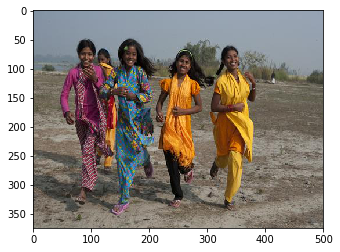

াঁচটি নারী এক জায়গায় চলছে।	


In [4]:
# displaying an image and captions given to it
temp = captions[10].split("#")
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imag = mpimg.imread(images_path+temp[0].strip())
plt.imshow(imag)
plt.show()

for ix in range(len(tokens[temp[0]])):
    print(tokens[temp[0]][ix])

In [5]:
# Creating train, test and validation dataset files with header as 'image_id' and 'captions'
train_dataset = open('flickr_8k_train_dataset.txt','wb')
#train_dataset.write(b"image_id\tcaptions\n")

#val_dataset = open('flickr_8k_val_dataset.txt','wb')
#val_dataset.write(b"image_id\tcaptions\n")

test_dataset = open('flickr_8k_test_dataset.txt','wb')
#test_dataset.write(b"image_id\tcaptions\n")


In [6]:
# Populating the above created files for train, test and validation dataset with image ids and captions for each of these images
for img in x_train:
    if img == '':
        continue
    for capt in tokens[img]:
        caption = "<start> "+ capt.strip() + " <end>"
        train_dataset.write((img+"\t"+caption+"\n").encode())
        train_dataset.flush()
train_dataset.close()

for img in x_test:
    if img == '':
        continue
    for capt in tokens[img]:
        caption = "<start> "+ capt.strip() + " <end>"
        test_dataset.write((img+"\t"+caption+"\n").encode())
        test_dataset.flush()
test_dataset.close()


In [7]:
# Loading 50 layer Residual Network Model and getting the summary of the model
from IPython.core.display import display, HTML
display(HTML("""<a href="http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006">ResNet50 Architecture</a>"""))
model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='avg')
model.summary()
# Note: For more details on ResNet50 architecture you can click on hyperlink given below

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [8]:
# Helper function to process images
def preprocessing(img_path):
    im = load_img(img_path, target_size=(224,224,3))
    im = img_to_array(im)
    im = np.expand_dims(im, axis=0)
    return im

In [9]:
train_data = {}
ctr=0
for ix in x_train:
    if ix == "":
        continue
    if ctr >= 3000:
        break
    ctr+=1
    if ctr%1000==0:
        print(ctr)
    ix=ix.strip()    
    path = images_path + ix
    img = preprocessing(path)
    pred = model.predict(img).reshape(2048)
    train_data[ix] = pred
    print(train_data[ix])

[1.2614903  0.         0.01312505 ... 1.2499857  0.         0.39118883]
[0.04405969 0.00667854 0.02386368 ... 0.         0.0219804  0.09972645]
[0.2940562  0.04884785 0.00222926 ... 0.         0.05839551 0.08813266]
[0.7651822  0.80121815 0.14142215 ... 0.41356108 1.3521528  0.13193731]
[0.48753247 0.30458567 0.20377046 ... 0.25926036 0.         0.        ]
[0.99454033 0.0617269  0.05768558 ... 4.393688   0.         0.        ]
[0.35199663 0.02273171 0.45795643 ... 0.05075667 0.16439141 0.56065315]
[0.08295646 0.3965642  0.09789728 ... 1.5252773  0.         0.00554642]
[0.4626307  1.1347461  0.09257553 ... 0.317426   0.899781   0.00136524]
[0.20126088 0.26574233 0.01828112 ... 0.01349676 0.42211077 0.        ]
[0.5463466  1.9692333  0.         ... 0.6801364  0.96948403 0.44422215]
[0.8111827  0.07520465 0.87346804 ... 0.         0.27196372 0.68418217]
[0.23668484 0.0410659  0.35273856 ... 0.05661411 0.2784467  0.01843755]
[2.391386   0.22631866 0.26330096 ... 0.15027706 0.08306362 0.02

[0.03965304 0.2703044  1.1097593  ... 0.08925962 0.03331222 1.7036749 ]
[2.910325   0.02688046 0.07824308 ... 0.23978952 0.06576584 0.7484141 ]
[0.9710538  0.20178103 0.09382135 ... 3.6136618  0.31860334 0.10018507]
[2.3999274  0.         0.03411272 ... 0.11799503 0.3736112  0.5389338 ]
[2.8565776  0.53458446 0.1376571  ... 0.         0.05112725 0.02269232]
[0.88918585 0.         0.08045202 ... 1.9405584  0.         0.        ]
[2.8355386  0.5429225  0.6006543  ... 0.50405514 2.075233   0.8768429 ]
[1.3053213  0.22448373 1.0705322  ... 0.9899783  0.05637863 0.08739938]
[0.4741246  0.00251264 0.39659503 ... 0.19539256 0.         0.        ]
[0.03250674 0.02009712 0.03264916 ... 0.04859639 0.04344755 0.        ]
[3.9193327  0.111818   0.00900093 ... 0.27514848 0.02513605 0.3241991 ]
[1.631016   0.85421413 0.         ... 0.         0.         0.        ]
[0.8503899  0.18944137 0.11300589 ... 0.12924923 0.0402105  0.1909834 ]
[0.5988401  0.0054431  0.         ... 0.0400244  0.06404737 0.31

[0.64231205 0.02644355 0.04404494 ... 0.66626376 0.00521668 0.28757545]
[1.0496391  1.4100785  0.         ... 0.1223814  0.06712304 0.9030479 ]
[0.43321535 1.2075331  0.22227746 ... 0.6832873  0.24065706 0.51321954]
[0.16483174 0.72446764 0.03973583 ... 0.59711885 0.15054445 0.07957689]
[0.48659822 0.0564356  0.45443243 ... 0.13456777 0.1128739  0.17911232]
[0.41931957 0.25231746 0.10668357 ... 0.01800783 0.         0.07632127]
[0.21733047 1.2162409  0.         ... 0.01033673 0.84365916 0.9537759 ]
[0.104551   0.         0.09189076 ... 0.00180122 0.09988822 0.08418026]
[0.30189934 0.46895382 0.1502669  ... 0.9409507  0.         0.01391615]
[0.08587316 0.7143399  0.06414925 ... 0.20750181 0.09191167 0.06715859]
[0.3109692  0.99475473 0.38373163 ... 0.6709791  0.41736734 0.17942245]
[0.50516015 0.07905735 0.01553259 ... 1.1551415  0.11053258 1.0993916 ]
[0.24411544 0.62400126 0.         ... 0.5412684  0.77980953 0.62291634]
[0.29680282 1.0491681  0.10119843 ... 2.0865114  0.         0.53

[0.40969363 0.26662213 0.09538588 ... 2.8294437  0.01645285 0.12228285]
[2.0723228  1.5572906  0.01281129 ... 0.         0.7090321  0.8528541 ]
[7.4780953e-01 6.0545795e-02 0.0000000e+00 ... 2.4026267e-04 0.0000000e+00
 6.9243677e-02]
[0.6901372  0.6926735  0.32211256 ... 0.19356969 0.01633228 0.7221014 ]
[0.30067688 0.01549838 0.42006785 ... 0.02046896 0.         0.        ]
[0.         0.         0.         ... 0.00551034 0.         0.        ]
[0.44589293 0.17820497 1.0857213  ... 0.4698297  0.82012135 0.612577  ]
[0.53702986 0.84511316 0.09429163 ... 0.5718313  2.5970469  0.        ]
[0.585197   1.272575   0.02378132 ... 0.         0.71593547 0.        ]
[1.2472843  3.5719826  0.11804243 ... 0.03587683 0.43325028 0.17628574]
[0.20181873 0.08239345 0.27995855 ... 5.0842104  0.         1.3185588 ]
[0.33687353 0.1130579  0.19250362 ... 0.7052725  0.00196863 0.0159532 ]
[0.5645002  2.400436   0.         ... 0.04950893 0.91024727 1.4404969 ]
[0.5581213  0.4591625  0.09203982 ... 0.07723

[3.6125085e-01 1.1025751e+00 0.0000000e+00 ... 9.4520438e-01 1.5424694e-01
 2.5829489e-05]
[0.8537437  2.1987333  0.30400598 ... 0.         0.09462322 0.05795574]
[1.0062522  1.0378715  0.13476574 ... 1.4695963  0.7467072  0.01962668]
[0.84550226 0.4617687  0.19237174 ... 0.04363123 0.08581685 0.38852435]
[0.02505765 1.5706245  0.01937669 ... 0.0473254  0.12273109 0.15440926]
[0.27284685 0.12871772 0.05400841 ... 7.0397234  0.11235745 0.        ]
[0.         0.         0.01407478 ... 0.11073424 0.15391375 0.        ]
[0.33665454 1.31857    0.03254199 ... 0.5473781  0.1799338  0.1206878 ]
[0.57114315 4.434947   0.         ... 0.         0.23857905 0.46987087]
[0.8907676  0.9138779  0.01231823 ... 0.58928305 0.         0.30631545]
[0.05650287 2.0674822  0.03960427 ... 0.         0.2746115  0.15720065]
[0.9554299  0.17197143 0.29333168 ... 0.         0.         0.9350616 ]
[0.2533993  2.0462563  0.00247556 ... 2.351228   0.         0.3351508 ]
[1.474492   1.8492689  0.         ... 0.02138

[0.7069435  2.6069171  0.01457981 ... 1.5024056  0.5552548  0.24927415]
[1.3051672  0.9199656  0.01163709 ... 0.         0.         0.32615587]
[0.71672297 1.0141242  0.20932801 ... 0.15023877 0.3768303  0.07337023]
[1.0440514  1.2727222  0.02106852 ... 0.3281499  0.46939594 0.04470593]
[5.2137542e-01 1.7950428e+00 0.0000000e+00 ... 1.5495602e-03 3.6439430e-02
 2.5334498e-01]
[0.5539308  0.46074736 0.07959527 ... 0.09235133 0.33394143 0.3123217 ]
[0.3348275  1.2373788  0.00968624 ... 0.20093249 1.3476075  0.00475268]
[0.52956593 0.48808903 0.14902043 ... 0.02547536 0.42704874 1.8457879 ]
[0.11591425 1.3011898  0.11520037 ... 0.2748152  0.19953035 0.09834798]
[0.87185025 3.5122793  0.11303025 ... 0.22528055 1.4094962  1.7263998 ]
[1.1764977  1.8882039  0.00839236 ... 0.         0.16932689 0.33822682]
[1.1415533  2.4387362  0.11736508 ... 0.24570253 0.56242186 0.63183373]
[0.5185268  2.3983555  0.07441302 ... 0.06938823 0.16388002 0.8019013 ]
[0.40862495 0.3949576  0.09412216 ... 0.39974

[1.154758   1.6953119  0.00843738 ... 0.         0.         0.54834324]
[0.8371337  0.18927395 0.05895827 ... 0.         0.04468602 1.0137523 ]
[0.89736944 3.865277   0.         ... 0.36233494 1.34344    0.        ]
[0.09371527 1.0542952  0.08581321 ... 0.14054283 0.12206848 0.552707  ]
[0.30943945 0.93751216 0.         ... 0.26827216 0.4721657  0.34407893]
[0.00655764 1.0142637  0.00406659 ... 0.         0.         1.8731172 ]
[0.3570719  2.196502   0.18760204 ... 1.544275   0.         0.4255216 ]
[0.         0.05865353 0.49971083 ... 1.9271821  0.32909143 0.        ]
[1.5019048  0.11005229 0.12114597 ... 0.         0.76929784 0.2152036 ]
[0.         0.5654472  0.00884606 ... 0.08678228 1.1622424  0.27464068]
[1.0193675  1.0500555  0.         ... 0.04115438 0.07292988 0.        ]
[0.5481542  0.36542636 0.2845128  ... 1.7488215  0.8911318  0.6750205 ]
[0.16499865 1.3184836  0.         ... 0.04097762 0.4702084  0.11818331]
[0.00905523 0.4577613  0.05268203 ... 0.0045348  0.         0.68

[0.32102862 0.01984657 0.         ... 0.         0.22269155 0.23598465]
[0.78809685 0.23625414 0.38472503 ... 0.392442   0.06939215 1.9084649 ]
[1.0810806  2.0165584  0.10533374 ... 0.80710906 1.3196121  0.3579543 ]
[0.538189   0.23666386 0.         ... 0.01184249 0.17836742 0.08378567]
[0.47718596 1.6545846  0.01177659 ... 0.05401864 0.01297825 0.64259547]
[0.6841443  1.5863729  0.04086532 ... 0.35837838 0.4663446  0.49097311]
[0.9119349  2.633722   0.         ... 0.01615798 0.8146441  2.176851  ]
[0.01733836 3.56222    0.02900996 ... 0.40060705 0.3453821  1.3436497 ]
[0.6724841  0.3298593  0.         ... 0.02427659 0.06577031 0.01984686]
[0.16376178 1.3677362  0.27876732 ... 0.8207382  0.24529827 0.349759  ]
[0.8953855  3.1427996  0.03750664 ... 0.6419377  1.2073162  0.7331253 ]
[0.65115654 0.9920514  1.1461554  ... 0.955163   0.17010424 0.14082421]
[0.43139002 3.4140368  0.8232021  ... 0.13126338 0.01439446 0.        ]
[0.8289917  2.49625    0.0146521  ... 0.05556644 0.23879616 0.02

[0.5031798  0.59995395 0.329656   ... 7.7566156  0.6689906  0.0771843 ]
[0.48413584 0.10501271 0.21122004 ... 0.00221799 0.34530422 0.00169269]
[0.07989266 1.0373273  0.15634894 ... 1.5546972  0.10327816 0.38969535]
[0.59150547 1.6643592  0.03371511 ... 0.05040215 0.02755426 0.5962302 ]
[0.28228366 1.3030158  0.3165574  ... 0.32142463 0.10602969 0.00617751]
[5.8606167  0.7701273  0.         ... 0.24129124 0.         0.41603687]
[0.69636846 0.70747226 0.06092256 ... 0.55742323 1.3064607  0.18891574]
[0.22309276 3.2903047  0.16109835 ... 0.         0.         0.28450474]
[0.1756572  0.2018095  0.         ... 0.32165486 0.         0.15552138]
[0.2391604  4.1627316  0.04610123 ... 0.6265911  0.40519387 1.1602677 ]
[0.         1.0135064  0.         ... 0.07148366 0.29871443 0.45018739]
[1.6904678  1.0562495  0.09659264 ... 0.4213712  0.04774991 0.2164845 ]
[1.4833388  3.6202786  0.         ... 0.         0.26347807 0.08225171]
[0.90935856 0.13380136 0.00533957 ... 1.3502026  0.23374219 0.78

[0.06800426 2.3971314  0.7167449  ... 0.02907225 0.         0.04211766]
[0.04914641 0.6403367  0.0326816  ... 0.16772564 0.01410451 0.        ]
[0.9346212  1.0631992  0.10391756 ... 0.         0.07512124 0.26487947]
[0.0305477  0.26111507 0.         ... 0.08436748 0.00642883 0.        ]
[0.12218211 0.0627289  0.2650517  ... 0.18123437 0.33100513 0.21067092]
[0.28595522 1.4387925  0.00526715 ... 0.         0.01411671 0.02131773]
[0.12756476 0.6610604  0.02538254 ... 0.         0.         0.01025147]
[0.3727502  1.1389647  0.         ... 0.35344023 2.1424208  0.22342846]
[0.3750238  0.0425991  0.         ... 0.09780836 0.         0.07317973]
[0.09272836 0.54696256 0.12750626 ... 0.01212995 0.4117084  0.07941847]
[1.2579921  3.1201901  0.         ... 0.02412664 1.0112473  1.2600214 ]
[0.14449285 0.5644458  0.18614699 ... 0.12791887 0.0303527  0.07794935]
[0.07232942 0.5887411  0.5073286  ... 0.01607954 0.10369192 0.01823201]
[1.2631745  0.7121089  0.13630727 ... 3.608312   0.419177   0.27

[0.5072485  0.08612341 0.3631079  ... 0.60291564 0.05702925 0.        ]
[0.8787746  0.76430583 0.08950736 ... 0.8328931  0.2922799  0.4702417 ]
[1.4408575  0.00745141 0.00550743 ... 0.2999612  0.         0.        ]
[0.78346    0.04117378 0.21940753 ... 0.48816478 0.07626475 0.33499646]
[2.2994733  0.23314436 1.0645784  ... 0.39138332 0.24526775 0.        ]
[0.08183083 0.9556327  0.         ... 0.3406339  0.15385923 1.001329  ]
[0.82954586 0.30857694 1.1074795  ... 0.12544546 0.62784606 0.19617388]
[0.3497669  1.2297446  0.         ... 3.4697716  0.04861555 0.47435096]
[1.3129512  2.7863407  0.21354988 ... 2.6639874  0.42490485 0.3895428 ]
[0.11225535 2.9656098  0.03171993 ... 0.20976327 0.7319312  0.        ]
[0.3167593  0.48766607 0.         ... 0.46745974 0.2817694  0.32021183]
[0.8065873  0.00387232 0.01453158 ... 0.         0.28165326 0.        ]
[0.18974076 0.43364954 0.05074837 ... 0.05923657 0.14461488 0.        ]
[0.43691072 0.19772765 0.14496283 ... 0.1294015  0.         0.16

[1.257812   1.9510427  0.         ... 3.454712   0.16425908 0.31735882]
[0.9202372  0.02329019 0.6585177  ... 0.8891349  0.         0.54982716]
[1.8903644  0.34246176 0.05896832 ... 0.60617864 2.8874972  0.16420652]
[2.972754   0.5824339  0.12834224 ... 0.         0.04131562 0.22521697]
[0.03691668 0.1431655  0.41725683 ... 0.5727729  0.40476033 2.1992817 ]
[7.52440691e-01 0.00000000e+00 2.55424147e-05 ... 0.00000000e+00
 1.41643375e-01 1.06763005e-01]
[1.3191289  0.22032246 0.11330065 ... 0.36845297 0.7227267  0.20530236]
[0.7832911  0.5138909  0.6053696  ... 0.03101221 0.17494792 0.24499315]
[0.60683143 0.05920206 0.7811701  ... 0.04829605 1.1340598  0.00414133]
[0.13554475 0.09681991 0.00385956 ... 0.14068809 0.         0.05534343]
[2.3697174  3.334551   0.25946373 ... 0.20751323 0.646243   0.00400865]
[1.9722153  0.75494915 0.06356328 ... 0.38973075 0.4460747  0.03573341]
[0.7767029  0.00440218 0.90956926 ... 1.5171849  0.3438269  0.        ]
[0.05415766 6.168254   0.22478831 ... 0

[0.09848301 0.         0.40686408 ... 0.60011005 0.         0.        ]
[0.07299849 0.15163048 0.80157894 ... 0.05347103 0.         0.09240032]
[0.3934713  0.0517436  0.16532832 ... 0.         0.03009799 0.01928098]
[0.08329199 0.08555403 0.00348473 ... 1.3574533  0.15819088 0.        ]
[0.16128695 0.07195783 0.02609137 ... 0.01653029 0.6073215  0.        ]
[0.16302821 0.49117428 0.         ... 0.00182971 0.         0.02890502]
[2.5061495  0.69091165 0.01760694 ... 1.086819   0.45174256 0.13702476]
[0.02516386 0.45257276 0.30434087 ... 0.07639173 0.1291591  0.08344304]
[0.         0.         0.35133588 ... 1.2290403  0.23456421 0.16986385]
[0.2245941  0.42424074 0.16301191 ... 1.467427   0.         0.00582111]
[0.03291817 0.         0.         ... 0.         0.         0.        ]
[0.23502183 0.2259943  0.28124526 ... 0.13062711 0.03218487 0.        ]
[0.16599184 0.01321158 0.03051704 ... 0.01622531 0.00453093 0.        ]
[0.17218722 0.3001597  0.14512248 ... 0.21675807 0.         0.33

[1.98479    2.8761573  0.439135   ... 0.3025993  0.08114757 1.1712139 ]
[0.1287866  0.05603761 0.         ... 0.01774604 0.01343786 0.09275089]
[0.8037219  0.03180079 0.04448557 ... 0.03992512 0.01999696 0.02330445]
[1.5261371  1.4533248  0.33525822 ... 0.36358646 1.2405173  0.47486678]
[0.7659722  0.34791234 0.15077889 ... 0.04041841 0.2788019  0.24376784]
[0.19716948 0.22769941 0.43058133 ... 0.5863842  0.33155662 0.        ]
[0.05939217 0.16840689 0.30789465 ... 0.         0.         0.01481782]
[0.04407228 0.00276368 0.02805962 ... 0.08365162 0.00491196 0.690193  ]
[0.740776   0.08850703 0.         ... 0.         0.         0.14219314]
[1.4350955  1.5048008  0.31104594 ... 0.25904843 0.0811066  0.2908138 ]
[0.2678672  0.17883414 0.         ... 0.00282993 0.         0.21204212]
[0.6773565  0.90596294 0.         ... 0.10118502 0.93558556 0.06504659]
[8.3022773e-01 1.2263481e-01 7.9226330e-02 ... 6.7400443e-04 0.0000000e+00
 1.0405972e+00]
[0.13879348 0.3799656  0.1233475  ... 0.15880

[0.9895535  2.547186   0.02241958 ... 0.207119   1.0514693  0.        ]
[1.8179871  1.7085937  0.08329535 ... 0.12524334 0.3734211  0.        ]
[0.6571059 2.2361898 0.        ... 0.146028  0.9149926 0.       ]
[0.11542467 0.6761986  0.18126322 ... 0.19442368 0.30813292 0.02137268]
[0.6263487  1.6143668  0.         ... 0.37937236 1.2424966  0.642296  ]
[0.08393082 1.1476519  0.3116792  ... 0.18854459 0.24664758 0.05279929]
[0.02985349 0.8884442  0.         ... 0.         0.81165576 0.01081368]
[0.31145498 0.7618499  1.3404888  ... 1.1869015  0.09384055 0.        ]
[0.08393082 1.1476519  0.3116792  ... 0.18854459 0.24664758 0.05279929]
[0.02985349 0.8884442  0.         ... 0.         0.81165576 0.01081368]
[0.09058502 1.3048654  0.03848343 ... 0.25823563 0.12354341 0.        ]
[0.03831869 0.5764939  0.00819002 ... 0.34058142 0.43452063 0.03523059]
[2.6835806  3.9412665  0.05437052 ... 0.15425135 0.74937534 1.2851462 ]
[2.8241875  2.844947   0.00571888 ... 0.3308227  1.2577451  1.2184659 

[0.5162747  0.35130358 0.19807497 ... 0.1831775  1.1943846  0.17707093]
[0.23339762 0.37269393 0.0627896  ... 0.15282305 0.40032044 0.9940445 ]
[0.5973664  0.05418949 0.33078334 ... 0.36135638 0.0767547  0.        ]
[0.5083738  2.7198303  0.02903162 ... 0.01281232 0.2747389  0.16689572]
[0.9056294  2.288401   0.41219404 ... 0.06400639 0.         0.7791676 ]
[0.7334191  0.58033216 0.69960743 ... 0.5647607  0.17064239 0.5458722 ]
[0.25737393 0.3031942  0.434381   ... 0.26566043 0.17331392 0.56063694]
[1.0359349  0.6086186  0.17891327 ... 0.3409746  0.03542665 0.5288953 ]
[0.82923585 0.5121032  0.07236981 ... 0.06049077 0.05987094 0.66212535]
[0.36889255 0.81217414 0.         ... 0.2612474  0.12914193 0.21031892]
[3.8881351e-03 2.0806789e-03 4.4854564e-04 ... 5.2730769e-01 1.3610141e-01
 0.0000000e+00]
[0.9203971  0.9932249  0.         ... 0.29480156 0.10575382 0.16208503]
[1.0010291  1.7255126  0.         ... 0.20279317 0.23352739 0.29729086]
[0.26121792 1.0639802  0.25757152 ... 1.55880

[0.34351543 0.11579408 0.09261043 ... 0.06641639 0.2813202  0.        ]
[0.67705333 0.02451335 0.0439208  ... 0.         0.4419295  1.3318709 ]
[0.6335931  0.03644972 0.24913312 ... 0.12161569 0.7968598  0.42188093]
[0.50518465 0.01559594 0.01393522 ... 0.11403828 0.5155804  0.12528002]
[1.5120952  2.7263153  0.00856319 ... 0.01486274 0.95050997 0.16309719]
[0.04432148 0.26736546 0.03662733 ... 0.20535977 0.4718657  0.21427621]
[0.5168196  0.83726346 0.00219691 ... 0.5310002  0.16288829 0.1368241 ]
[0.2580395  0.12331972 0.44129452 ... 0.6096868  0.00186558 0.        ]
[0.2203413  0.32516837 0.         ... 0.21624719 0.20623393 0.02948954]
[0.6614832  1.2078744  0.08798005 ... 0.18541655 0.9946694  0.6309533 ]
[0.21053192 0.07457218 0.03378673 ... 0.         0.12569416 0.11323146]
[0.53414583 2.9218526  0.23931256 ... 0.11397868 1.040482   0.42078638]
[2.1770377  1.3101449  0.2603331  ... 0.15076353 0.5253959  1.0882788 ]
[0.78395176 2.6877964  0.68321526 ... 0.05562849 0.06131086 0.77

[0.7122047  0.8524218  0.3642573  ... 0.01915506 0.48866785 1.0584557 ]
[0.9655567  1.0851831  0.28960353 ... 0.05480609 0.9986809  0.10614633]
[0.5367126  0.723706   0.07151344 ... 0.         0.96321046 0.14714421]
[0.64284474 0.33435678 0.07853404 ... 0.         0.40452424 0.01436293]
[0.7287227  0.38118172 0.5928669  ... 0.20159665 0.03278246 0.26211607]
[0.22881526 0.8528504  0.9047183  ... 0.36662602 0.         0.6273119 ]
[0.1998326  1.2119584  0.46346927 ... 0.3715195  0.         0.9634574 ]
[0.45930108 1.569328   0.09094251 ... 0.28452656 0.3808669  0.25331232]
[0.26765966 1.4956919  0.00945276 ... 0.48247957 0.         0.96403044]
[0.23011793 0.48318395 0.67792106 ... 0.21068212 0.         0.1261439 ]
[0.65917355 1.2312405  0.82961595 ... 0.3571097  0.0121006  0.7106742 ]
[0.48335811 1.0256466  0.45527366 ... 0.00690304 0.04014305 0.43700075]
[0.36818594 0.34592476 0.687158   ... 0.         0.         0.1041569 ]
[0.53587234 1.0174743  0.5883982  ... 0.         0.0885791  0.34

In [10]:
train_data['img_0000001.jpg'].shape

(2048,)

In [11]:
train_data

{'img_0000001.jpg': array([1.2614903 , 0.        , 0.01312505, ..., 1.2499857 , 0.        ,
        0.39118883], dtype=float32),
 'img_0000002.jpg': array([0.04405969, 0.00667854, 0.02386368, ..., 0.        , 0.0219804 ,
        0.09972645], dtype=float32),
 'img_0000003.jpg': array([0.2940562 , 0.04884785, 0.00222926, ..., 0.        , 0.05839551,
        0.08813266], dtype=float32),
 'img_0000004.jpg': array([0.7651822 , 0.80121815, 0.14142215, ..., 0.41356108, 1.3521528 ,
        0.13193731], dtype=float32),
 'img_0000005.jpg': array([0.48753247, 0.30458567, 0.20377046, ..., 0.25926036, 0.        ,
        0.        ], dtype=float32),
 'img_0000006.jpg': array([0.99454033, 0.0617269 , 0.05768558, ..., 4.393688  , 0.        ,
        0.        ], dtype=float32),
 'img_0000007.jpg': array([0.35199663, 0.02273171, 0.45795643, ..., 0.05075667, 0.16439141,
        0.56065315], dtype=float32),
 'img_0000008.jpg': array([0.08295646, 0.3965642 , 0.09789728, ..., 1.5252773 , 0.        ,
     

In [12]:
# opening train_encoded_images.p file and dumping it's content
with open( "train_encoded_images.p", "wb" ) as pickle_f:
    pickle.dump(train_data, pickle_f) 


In [14]:
# Loading image and its corresponding caption into a dataframe and then storing values from dataframe into 'ds'
pd_dataset = pd.read_csv("flickr_8k_train_dataset.txt", delimiter= ' \t')
ds = pd_dataset.values
print(ds.shape)

(2028, 2)


/home/kawser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [15]:
pd_dataset

,image_id,captions
0,img_0000001.jpg,<start> কটি শহরে আমরা অনেক ধরনের ভবন দেখতে পাই...
1,img_0000002.jpg,<start> কটি ক্ষেত্র পাশে একটি গেট। <end>
2,img_0000003.jpg,<start> ্রামে হাঁটা দুই শিশু। <end>
3,img_0000004.jpg,<start> িছু লোক নদী পার করছে। <end>
4,img_0000005.jpg,<start> ক কৃষক ক্ষেত্র কাজ করছে। <end>
5,img_0000006.jpg,<start> কটি গ্রামে সবুজ ক্ষেত্র। <end>
6,img_0000007.jpg,<start> কটি পুরুষ একটি মাঠে একটি মহিলার সঙ্গে ...
7,img_0000008.jpg,<start> কটি ভবন সঙ্গে সবুজ ক্ষেত্র। <end>
8,img_0000009.jpg,<start> িছু শিশু তাদের স্কুল থেকে বাড়িতে যায়...
9,img_0000010.jpg,<start> কটি ক্ষেত্রের কিছু ঘর। <end>


In [16]:
# Storing all the captions from ds into a list
sentences = []
for ix in range(ds.shape[0]):
    sentences.append(ds[ix, 1])
    
print(len(sentences))

2028


In [17]:
# First 5 captions stored in sentences
sentences[:5]

['<start> কটি শহরে আমরা অনেক ধরনের ভবন দেখতে পাই। <end>',
 '<start> কটি ক্ষেত্র পাশে একটি গেট। <end>',
 '<start> ্রামে হাঁটা দুই শিশু। <end>',
 '<start> িছু লোক নদী পার করছে। <end>',
 '<start> ক কৃষক ক্ষেত্র কাজ করছে। <end>']

In [18]:
# Storing all the captions from ds into a list
sentences = []
for ix in range(ds.shape[0]):
    sentences.append(ds[ix, 1])
    
print(len(sentences))

2028


In [19]:
# Splitting each captions stored in 'sentences' and storing them in 'words' as list of list
#tokenizer = TokenizeSentence('bengali')
#bengali=[tokenizer.tokenize(sentences[0])]
#bengali_text_tokenize = [tokenizer.tokenize(str(i)) for i in sentences]
#bengali
words = [re.split(" ",str(sentences[i])) for i in range(2028)]
print(type(sentences[0]))
print(sentences[0])
words

<class 'str'>
<start> কটি শহরে আমরা অনেক ধরনের ভবন দেখতে পাই। <end>


[['<start>',
  'কটি',
  'শহরে',
  'আমরা',
  'অনেক',
  'ধরনের',
  'ভবন',
  'দেখতে',
  'পাই।',
  '<end>'],
 ['<start>', 'কটি', 'ক্ষেত্র', 'পাশে', 'একটি', 'গেট।', '<end>'],
 ['<start>', '্রামে', 'হাঁটা', 'দুই', 'শিশু।', '<end>'],
 ['<start>', 'িছু', 'লোক', 'নদী', 'পার', 'করছে।', '<end>'],
 ['<start>', 'ক', 'কৃষক', 'ক্ষেত্র', 'কাজ', 'করছে।', '<end>'],
 ['<start>', 'কটি', 'গ্রামে', 'সবুজ', 'ক্ষেত্র।', '<end>'],
 ['<start>',
  'কটি',
  'পুরুষ',
  'একটি',
  'মাঠে',
  'একটি',
  'মহিলার',
  'সঙ্গে',
  'কাজ',
  'করে।',
  '<end>'],
 ['<start>', 'কটি', 'ভবন', 'সঙ্গে', 'সবুজ', 'ক্ষেত্র।', '<end>'],
 ['<start>',
  'িছু',
  'শিশু',
  'তাদের',
  'স্কুল',
  'থেকে',
  'বাড়িতে',
  'যায়।',
  '<end>'],
 ['<start>', 'কটি', 'ক্ষেত্রের', 'কিছু', 'ঘর।', '<end>'],
 ['<start>', 'াঁচটি', 'নারী', 'এক', 'জায়গায়', 'চলছে।', '<end>'],
 ['<start>', 'িছু', 'লোক', 'পাহাড়ে', 'বসে', 'আছে।', '<end>'],
 ['<start>',
  'িছু',
  'গ্রামের',
  'মানুষ',
  'নদী',
  'পার',
  'হয়ে',
  'যায়।',
  '<end>'],
 ['<start>', 'াঁচটি', 

In [91]:
print(type(sentences))

<class 'list'>


In [20]:
# Creating a list of all unique words
unique = []
for i in words:
    unique.extend(i)
unique = list(set(unique))

print(len(unique))

vocab_size = len(unique)

1506


In [21]:
# Vectorization
word_2_indices = {val:index for index, val in enumerate(unique)}
indices_2_word = {index:val for index, val in enumerate(unique)}

In [22]:
word_2_indices['UNK'] = 0
word_2_indices['raining'] = 1506

In [23]:


indices_2_word[0] = 'UNK'
indices_2_word[1506] = 'raining'



In [24]:
print(word_2_indices['<start>'])
print(indices_2_word[1100])
print(word_2_indices['<end>'])
print(indices_2_word[1504])

651
কাপড়
896
কেন্দ্রের


In [25]:
vocab_size = len(word_2_indices.keys())
print(vocab_size)

1508


In [26]:
max_len = 0

for i in sentences:
    i = str(i).split()
    if len(i) > max_len:
        max_len = len(i)

print(max_len)

19


In [27]:
padded_sequences, subsequent_words = [], []

for ix in range(1784):
    partial_seqs = []
    next_words = []
    text = str(ds[ix, 1]).split()
    text = [word_2_indices[i] for i in text]
    for i in range(1, len(text)):
        partial_seqs.append(text[:i])
        next_words.append(text[i])
    padded_partial_seqs = sequence.pad_sequences(partial_seqs, max_len, padding='post')

    next_words_1hot = np.zeros([len(next_words), vocab_size], dtype=np.bool)
    
    #Vectorization
    for i,next_word in enumerate(next_words):
        next_words_1hot[i, next_word] = 1
        
    padded_sequences.append(padded_partial_seqs)
    subsequent_words.append(next_words_1hot)
    
padded_sequences = np.asarray(padded_sequences)
subsequent_words = np.asarray(subsequent_words)

print(padded_sequences.shape)
print(subsequent_words.shape)

(1784,)
(1784,)


In [28]:
print(len(padded_sequences[0]))

9


In [29]:
for ix in range(len(padded_sequences[0])):
    for iy in range(max_len):
        print(indices_2_word[padded_sequences[0][ix][iy]],)
    print("\n")

print(len(padded_sequences[0]))

<start>
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK


<start>
কটি
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK


<start>
কটি
শহরে
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK


<start>
কটি
শহরে
আমরা
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK


<start>
কটি
শহরে
আমরা
অনেক
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK


<start>
কটি
শহরে
আমরা
অনেক
ধরনের
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK


<start>
কটি
শহরে
আমরা
অনেক
ধরনের
ভবন
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK


<start>
কটি
শহরে
আমরা
অনেক
ধরনের
ভবন
দেখতে
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK


<start>
কটি
শহরে
আমরা
অনেক
ধরনের
ভবন
দেখতে
পাই।
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK
UNK


9


In [30]:
num_of_images = 1784

In [31]:
captions = np.zeros([0, max_len])
next_words = np.zeros([0, vocab_size])

In [32]:
for ix in range(num_of_images):#img_to_padded_seqs.shape[0]):
    captions = np.concatenate([captions, padded_sequences[ix]])
    next_words = np.concatenate([next_words, subsequent_words[ix]])

np.save("captions.npy", captions)
np.save("next_words.npy", next_words)

print(captions.shape)
print(next_words.shape)

(9975, 19)
(9975, 1508)


In [33]:
with open('/home/kawser/Desktop/Machine learning projects/Deep Learning/bangla-natural-language-image-to-text-bnlit/train_encoded_images.p', 'rb') as f:
    encoded_images = pickle.load(f, encoding="bytes")
encoded_images['img_0000001.jpg']
#ds.shape[0]
ds[1,0]
#bytes(ds[1,0].encode())
#encoded_images.keys()
#print(ds[1, 0].encode())

'img_0000002.jpg'

In [34]:
imgs = []

for ix in range(ds.shape[0]):
    #print(ix,ds[ix, 0].encode())
    if ds[ix, 0] in encoded_images.keys():
        print(ix, encoded_images[ds[ix, 0]])
        imgs.append(list(encoded_images[ds[ix, 0]]))

imgs = np.asarray(imgs)
#print(imgs.shape)
print(imgs)

0 [1.2614903  0.         0.01312505 ... 1.2499857  0.         0.39118883]
1 [0.04405969 0.00667854 0.02386368 ... 0.         0.0219804  0.09972645]
2 [0.2940562  0.04884785 0.00222926 ... 0.         0.05839551 0.08813266]
3 [0.7651822  0.80121815 0.14142215 ... 0.41356108 1.3521528  0.13193731]
4 [0.48753247 0.30458567 0.20377046 ... 0.25926036 0.         0.        ]
5 [0.99454033 0.0617269  0.05768558 ... 4.393688   0.         0.        ]
6 [0.35199663 0.02273171 0.45795643 ... 0.05075667 0.16439141 0.56065315]
7 [0.08295646 0.3965642  0.09789728 ... 1.5252773  0.         0.00554642]
8 [0.4626307  1.1347461  0.09257553 ... 0.317426   0.899781   0.00136524]
9 [0.20126088 0.26574233 0.01828112 ... 0.01349676 0.42211077 0.        ]
10 [0.5463466  1.9692333  0.         ... 0.6801364  0.96948403 0.44422215]
11 [0.8111827  0.07520465 0.87346804 ... 0.         0.27196372 0.68418217]
12 [0.23668484 0.0410659  0.35273856 ... 0.05661411 0.2784467  0.01843755]
13 [2.391386   0.22631866 0.2633009

155 [0.8782024  0.02988588 0.5065913  ... 0.         0.         0.        ]
156 [0.5689004  0.49414545 0.9811689  ... 0.02575867 0.04188844 0.56939375]
157 [0.24513423 0.05195789 0.58574337 ... 0.07499263 0.07765451 0.02577989]
158 [0.23750211 1.2380134  0.50642264 ... 1.4043121  0.10858322 0.02441366]
159 [0.85892504 0.32116455 1.002532   ... 0.3238934  0.00428197 0.19341482]
160 [1.5736557  0.11262364 0.24594961 ... 0.31721726 0.47666627 0.        ]
161 [0.7038078  0.00696369 0.00073508 ... 0.00427985 0.06098926 0.00179846]
162 [0.27830705 0.05238125 0.3334939  ... 0.13217795 0.02314861 0.5450293 ]
163 [0.61628354 0.9075038  0.0573568  ... 0.099759   0.24293163 1.5967693 ]
164 [0.19744305 0.02512472 1.3399574  ... 1.2006546  0.7348944  0.        ]
165 [0.         0.00659721 0.02567775 ... 0.1864901  0.01462466 0.01788594]
166 [0.43921632 0.         0.77594954 ... 0.09506598 0.02684529 0.2243225 ]
167 [0.19881873 0.15426335 0.4688801  ... 0.12282235 0.         0.06836795]
168 [0.28756

1348 [0.08209559 0.07233778 0.34401473 ... 0.10690393 0.27776176 0.21242659]
1349 [0.70443857 0.92177707 0.20909606 ... 0.68962437 0.5953203  0.6277399 ]
1350 [0.         0.02497771 0.53395367 ... 3.6503038  0.         0.        ]
1351 [0.6300334  0.65081173 0.22814669 ... 0.         0.         0.0641216 ]
1352 [0.36704546 0.3022009  0.868185   ... 0.00578795 0.08997745 0.12724583]
1353 [0.6461788  0.46462265 0.48862645 ... 1.0440503  0.01241956 0.04974385]
1354 [0.19389914 0.         0.20350641 ... 1.3482158  0.49447072 0.        ]
1355 [0.19295195 0.01805551 0.2297348  ... 0.41587472 0.         0.        ]
1356 [0.51168126 0.07801394 0.17773774 ... 0.02376972 0.         0.        ]
1357 [1.4645904  2.7527335  0.04179471 ... 2.2506607  0.18798931 0.43995586]
1358 [0.0171312  0.34947515 1.7776961  ... 0.2309218  0.12343366 0.        ]
1359 [0.09848301 0.         0.40686408 ... 0.60011005 0.         0.        ]
1360 [0.07299849 0.15163048 0.80157894 ... 0.05347103 0.         0.09240032]

1659 [2.164707   2.0649571  0.         ... 0.08585104 1.0147505  0.63930625]
1660 [1.6671729  2.4732208  0.29181388 ... 0.20831746 2.107594   0.43204242]
1661 [1.3816452  2.6574037  0.         ... 0.2918435  0.59584117 0.26885545]
1662 [0.87262213 2.9323168  0.         ... 0.22483686 0.85090536 0.27218816]
1663 [0.1305203  1.0214313  0.38132608 ... 1.0514435  0.6820906  0.4690558 ]
1664 [0.6439693  1.5097166  0.3121442  ... 0.529833   1.3421947  0.03288997]
1665 [3.0083513e-01 4.9310109e-01 2.3862680e-02 ... 7.7429473e-02 3.1793783e+00
 7.0929527e-05]
1666 [0.36978558 0.47146535 0.5945286  ... 0.3725362  0.53948826 0.0402258 ]
1667 [0.27537128 0.48959526 0.03811108 ... 0.82537407 0.99188745 0.03937398]
1668 [0.2520521  2.72266    0.08407842 ... 0.43024877 0.56442446 0.23513503]
1669 [1.6345605  0.0082724  0.13615777 ... 0.         0.23004715 0.        ]
1670 [0.06828869 0.         0.03299177 ... 0.05958157 0.         0.27982196]
1671 [0.0662204  0.57778615 0.5150148  ... 0.01606966 0.1

In [35]:


images = []
print(num_of_images)
for ix in range(1784):
    #print(padded_sequences[1784-1].shape[0])
    for iy in range(padded_sequences[ix].shape[0]):
        images.append(imgs[ix])
        
images = np.asarray(images)

np.save("images.npy", images)

print(images.shape)



1784
(9975, 2048)


In [36]:
image_names = []

for ix in range(num_of_images):
    for iy in range(padded_sequences[ix].shape[0]):
        image_names.append(ds[ix, 0])
        
image_names = np.asarray(image_names)

np.save("image_names.npy", image_names)

print(len(image_names))

9975


In [37]:
captions = np.load("captions.npy")
next_words = np.load("next_words.npy")

print(captions.shape)
print(next_words.shape)

(9975, 19)
(9975, 1508)


In [38]:
images = np.load("images.npy")

print(images.shape)

(9975, 2048)


In [39]:
imag = np.load("image_names.npy")
        
print(imag.shape)

(9975,)


In [40]:
embedding_size = 128
max_len = 19

In [41]:
image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               262272    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 19, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________


In [42]:
language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 19, 128)           193024    
_________________________________________________________________
lstm_1 (LSTM)                (None, 19, 256)           394240    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 19, 128)           32896     
Total params: 620,160
Trainable params: 620,160
Non-trainable params: 0
_________________________________________________________________


In [43]:
conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
embedding_1_input (InputLayer)  (None, 19)           0                                            
__________________________________________________________________________________________________
dense_1_input (InputLayer)      (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 19, 128)      193024      embedding_1_input[0][0]          
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          262272      dense_1_input[0][0]              
__________________________________________________________________________________________________
lstm_1 (LS

In [44]:
hist = model.fit([images, captions], next_words, batch_size=512, epochs=100)

Epoch 1/100
9975/9975 [==============================] - 47s 5ms/step - loss: 5.5207 - acc: 0.1464
Epoch 2/100
9975/9975 [==============================] - 45s 4ms/step - loss: 5.2011 - acc: 0.1544
Epoch 3/100
9975/9975 [==============================] - 45s 5ms/step - loss: 5.0668 - acc: 0.1628
Epoch 4/100
9975/9975 [==============================] - 45s 5ms/step - loss: 4.8459 - acc: 0.2065
Epoch 5/100
9975/9975 [==============================] - 45s 5ms/step - loss: 4.7273 - acc: 0.2065
Epoch 6/100
9975/9975 [==============================] - 45s 5ms/step - loss: 4.5904 - acc: 0.2187
Epoch 7/100
9975/9975 [==============================] - 45s 4ms/step - loss: 4.4955 - acc: 0.2193
Epoch 8/100
9975/9975 [==============================] - 45s 5ms/step - loss: 4.3242 - acc: 0.2306
Epoch 9/100
9975/9975 [==============================] - 45s 4ms/step - loss: 4.2901 - acc: 0.2293
Epoch 10/100
9975/9975 [==============================] - 45s 5ms/step - loss: 4.2310 - acc: 0.2286
Epoch 11/

9975/9975 [==============================] - 45s 5ms/step - loss: 0.7199 - acc: 0.7939
Epoch 84/100
9975/9975 [==============================] - 45s 5ms/step - loss: 0.6532 - acc: 0.8106
Epoch 85/100
9975/9975 [==============================] - 45s 5ms/step - loss: 0.6981 - acc: 0.7962
Epoch 86/100
9975/9975 [==============================] - 45s 4ms/step - loss: 0.5956 - acc: 0.8366
Epoch 87/100
9975/9975 [==============================] - 45s 4ms/step - loss: 0.5570 - acc: 0.8448
Epoch 88/100
9975/9975 [==============================] - 45s 4ms/step - loss: 0.5180 - acc: 0.8565
Epoch 89/100
9975/9975 [==============================] - 45s 4ms/step - loss: 0.5331 - acc: 0.8514
Epoch 90/100
9975/9975 [==============================] - 44s 4ms/step - loss: 0.5821 - acc: 0.8308
Epoch 91/100
9975/9975 [==============================] - 45s 4ms/step - loss: 0.4963 - acc: 0.8651
Epoch 92/100
9975/9975 [==============================] - 45s 4ms/step - loss: 0.4268 - acc: 0.8793
Epoch 93/100


In [45]:
model.save_weights("model_weights2.h5")

In [46]:
def preprocessing(img_path):
    im = image.load_img(img_path, target_size=(224,224,3))
    im = image.img_to_array(im)
    im = np.expand_dims(im, axis=0)
    return im

In [47]:
def get_encoding(model, img):
    image = preprocessing(img)
    pred = model.predict(image).reshape(2048)
    return pred

In [48]:
resnet = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='avg')

In [87]:
#img = "../input/flickr_data/Flickr_Data/Images/1453366750_6e8cf601bf.jpg"
img ='/home/kawser/Desktop/Machine learning projects/Deep Learning/bangla-natural-language-image-to-text-bnlit/bangla natural language image to text (bnlit)-preprocessing and resizing dataset-resized-500_375/Ji_1745.jpg'


test_img = get_encoding(resnet, img)

In [88]:
def predict_captions(image):
    start_word = ["<start>"]
    while True:
        par_caps = [word_2_indices[i] for i in start_word]
        par_caps = sequence.pad_sequences([par_caps], maxlen=max_len, padding='post')
        preds = model.predict([np.array([image]), np.array(par_caps)])
        word_pred = indices_2_word[np.argmax(preds[0])]
        start_word.append(word_pred)
        
        if word_pred == "<end>" or len(start_word) > max_len:
            break
            
    return ' '.join(start_word[1:-1])

Argmax_Search = predict_captions(test_img)

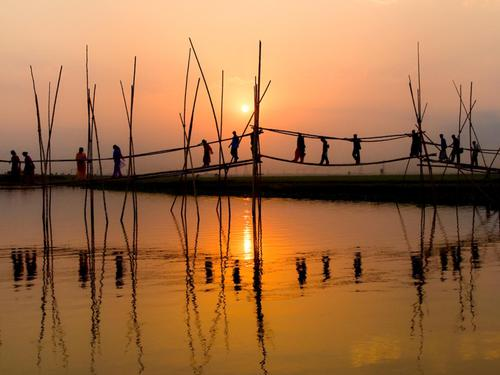

টি দাড়িয়ে ছবি তুলছে।


In [89]:
z = Image(filename=img)
display(z)

print(Argmax_Search)